In [1]:
from stats_can import StatsCan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#seaborn theme
import seaborn as sns
sns.set(font='Arial')

C:\Users\Maln\AppData\Roaming\Python\Python37\site-packages\requests\__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.7) or chardet (4.0.0) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
sc = StatsCan()
#sc.update_tables()
mortgage_rate = sc.table_to_df('34-10-0145-01')[['REF_DATE','VALUE']]

34100145-eng.zip: 100%|██████████| 6.29k/6.29k [00:00<00:00, 2.10MB/s]


In [3]:
mortgage_rate.columns = ['Date','5 Year Conventional Mortgage Rate']

In [4]:
mortgage_rate=mortgage_rate.set_index('Date')

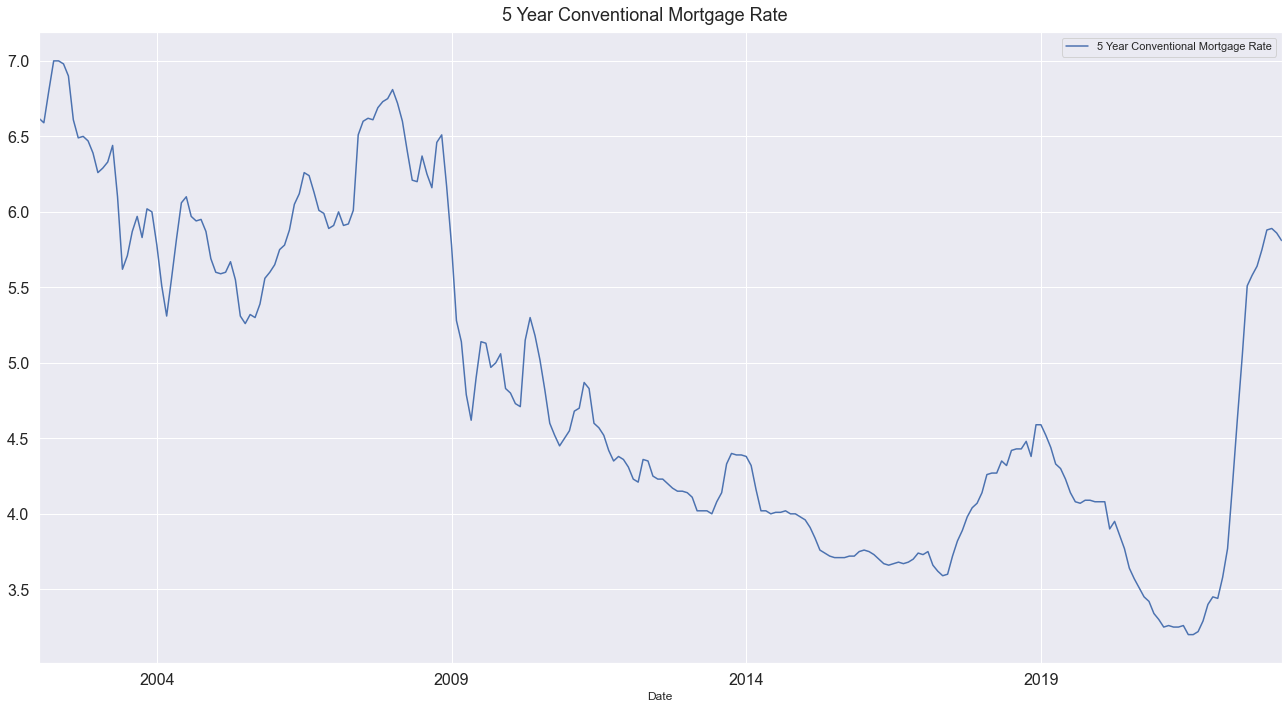

In [6]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('5 Year Conventional Mortgage Rate', fontsize=18)

mortgage_rate['2002':].plot(legend='false',fontsize=16,ax=ax)
plt.tight_layout()
#plt.savefig('../5yearmortgage.png')

In [19]:
apt_price = pd.read_csv('../data/calgary_resales/apartment_avg_price.csv',index_col=0)
apt_price.index = apt_price.index.rename('Date')
sfd_price = pd.read_csv('../data/calgary_resales/detached_avg_price.csv',index_col=0)
sfd_price.index = sfd_price.index.rename('Date')


In [20]:
apt_price

,apartment_avg_price
Date,
2006-01-31,207293.0
2006-02-28,207658.0
2006-03-31,230784.0
2006-04-30,247184.0
2006-05-31,267452.0
...,...
2022-08-31,270176.0
2022-09-30,308639.0
2022-10-31,297374.0


In [21]:
prices = sfd_price.join(apt_price)

In [23]:
prices

,detached_avg_price,apartment_avg_price
Date,,
2006-01-31,348016.0,207293.0
2006-02-28,368067.0,207658.0
2006-03-31,391009.0,230784.0
2006-04-30,399714.0,247184.0
2006-05-31,427330.0,267452.0
...,...,...
2022-08-31,636353.0,270176.0
2022-09-30,638813.0,308639.0
2022-10-31,655584.0,297374.0


In [24]:
mortgage_rate['2006':]

,5 Year Conventional Mortgage Rate
Date,
2006-01-01,5.65
2006-02-01,5.75
2006-03-01,5.78
2006-04-01,5.88
2006-05-01,6.05
...,...
2022-10-01,5.75
2022-11-01,5.88
2022-12-01,5.89


In [77]:
def mortgage_payment(mortgage_rate, price,down=0.05,mli=0.04,amort = 25):
    mtg_pmt = []
    
    payment_period = amort*12
    for i in range(len(mortgage_rate)):
        rate = mortgage_rate.iloc[i]/100
        
        principal = price.iloc[i] - (down*price.iloc[i])
        mtgi_premium = mli*principal
        total_mtg = principal+mtgi_premium
        month_pay = (rate/12)*(1/(1-(1+rate/12)**(-payment_period)))*total_mtg
        mtg_pmt.append(month_pay)

    return mtg_pmt



In [82]:
mtg_pay = mortgage_payment(mortgage_rate=mortgage_rate['2006':'2022']['5 Year Conventional Mortgage Rate'],price=prices['detached_avg_price'],down=0.2,mli=0)

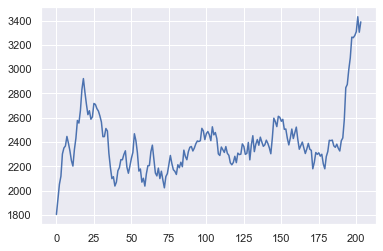

In [79]:
plt.plot(mtg_pay)

In [71]:
mtg_pay

[2142.3886022775046,
 2287.7466654585273,
 2437.352719810693,
 2515.5688374073784,
 2733.172442901359,
 2791.7405621522703,
 2811.49398778676,
 2904.7022774369443,
 2839.929836099857,
 2763.9519131618326,
 2668.882096917385,
 2614.9940855842387,
 2777.071218776672,
 2887.3595949935475,
 3060.651148393051,
 3035.436895783602,
 3156.954382257921,
 3362.8959218279615,
 3470.3327594287134,
 3337.752826332557,
 3220.6908806717784,
 3117.73132203091,
 3156.1757895117594,
 3072.9462698873076,
 3096.023151395269,
 3227.0481690250735,
 3217.4108186184744,
 3176.755661520466,
 3153.0880545593272,
 3105.3353052904095,
 3045.7727471720586,
 2902.251131203804,
 2903.293338905322,
 2982.4004577378896,
 2958.189512604666,
 2738.530994323202,
 2602.0728301431855,
 2492.1414180461798,
 2510.928071756369,
 2419.9661489635596,
 2458.138862751268,
 2569.1267877015152,
 2600.218164616022,
 2677.988590590007,
 2676.5824422120163,
 2728.423685563423,
 2764.199654120253,
 2605.654194394571,
 2544.934675546055

In [83]:
prices['SFD Average Mortgage Payment 20%_down']=mtg_pay

In [84]:

prices['SFD Average Mortgage Payment 5%_down']=mortgage_payment(mortgage_rate=mortgage_rate['2006':'2022']['5 Year Conventional Mortgage Rate'],price=prices['detached_avg_price'],down=0.05)
prices['APT Average Mortgage Payment 5%_down']=mortgage_payment(mortgage_rate=mortgage_rate['2006':'2022']['5 Year Conventional Mortgage Rate'],price=prices['apartment_avg_price'],down=0.05)
prices['APT Average Mortgage Payment 20%_down']=mortgage_payment(mortgage_rate=mortgage_rate['2006':'2022']['5 Year Conventional Mortgage Rate'],price=prices['apartment_avg_price'],down=0.20,mli=0)


In [85]:
prices

,detached_avg_price,apartment_avg_price,SFD Average Mortgage Payment 20%_down,SFD Average Mortgage Payment 5%_down,APT Average Mortgage Payment 5%_down,APT Average Mortgage Payment 20%_down
Date,,,,,,
2006-01-31,348016.0,207293.0,1734.727613,2142.388602,1276.096963,1033.276893
2006-02-28,368067.0,207658.0,1852.426450,2287.746665,1290.713096,1045.111819
2006-03-31,391009.0,230784.0,1973.564955,2437.352720,1438.590953,1164.850974
2006-04-30,399714.0,247184.0,2036.897844,2515.568837,1555.633196,1259.622021
2006-05-31,427330.0,267452.0,2213.095095,2733.172443,1710.604068,1385.104508
...,...,...,...,...,...,...
2022-08-31,636353.0,270176.0,3150.579621,3890.965832,1651.984959,1337.639643
2022-09-30,638813.0,308639.0,3181.167142,3928.741420,1898.149886,1536.963470
2022-10-31,655584.0,297374.0,3299.456734,4074.829066,1848.349287,1496.639099


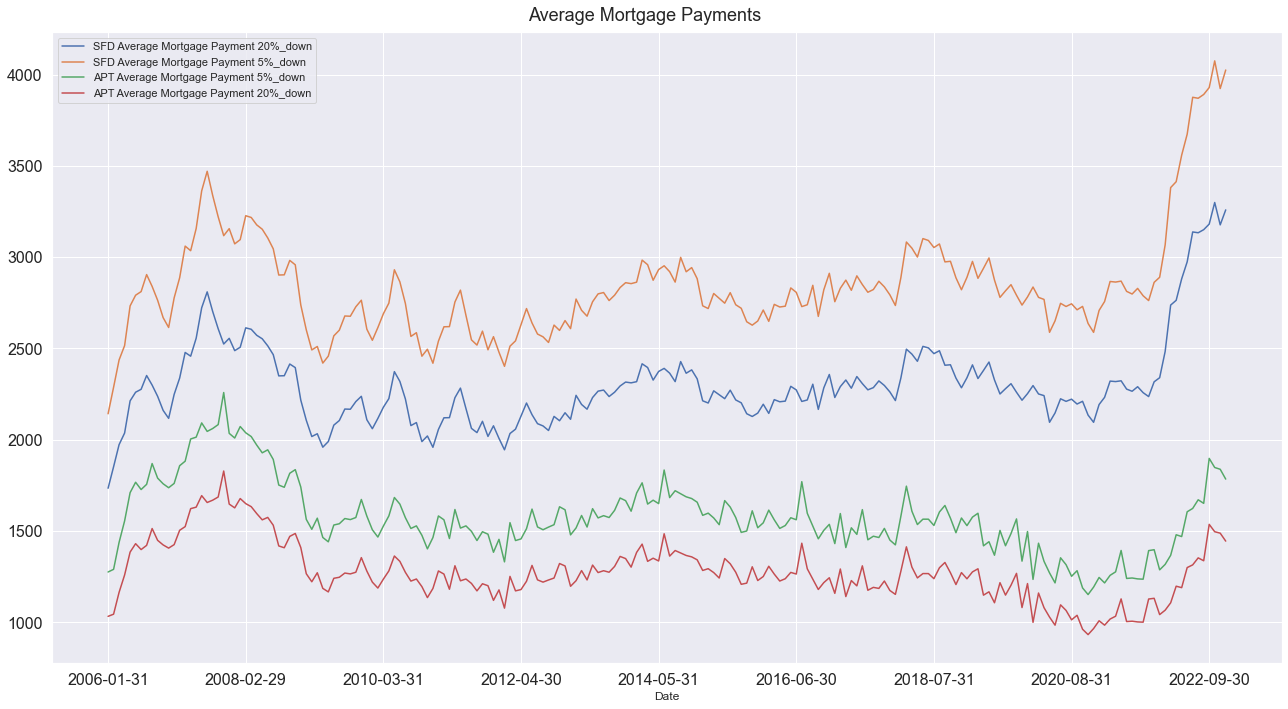

In [86]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Average Mortgage Payments', fontsize=18)

prices[['SFD Average Mortgage Payment 20%_down','SFD Average Mortgage Payment 5%_down','APT Average Mortgage Payment 5%_down','APT Average Mortgage Payment 20%_down']].plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()
#plt.savefig('edmonton/resale_prices.png')

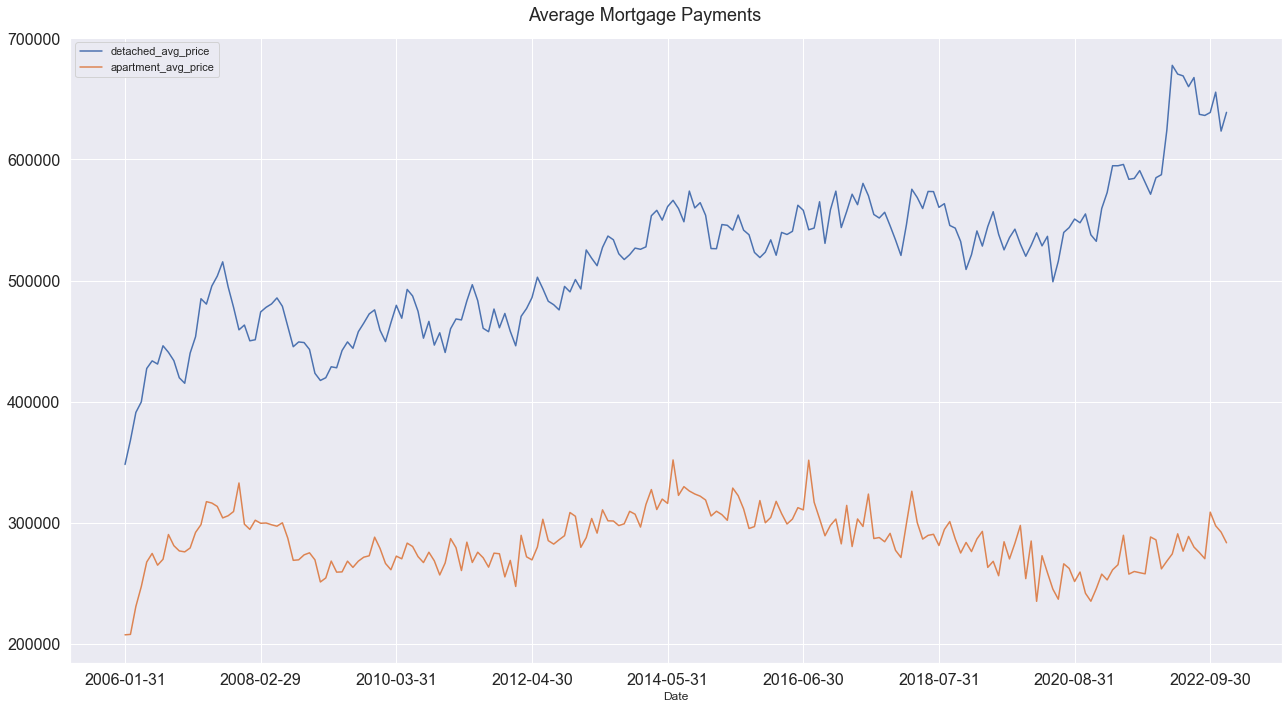

In [88]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Average Mortgage Payments', fontsize=18)

prices[['detached_avg_price','apartment_avg_price']].plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()


In [31]:
prices.tail(12)

,"Average, All Types",Single Detached,Apartment/Condos,Other,Average Mortgage Payment
Date,,,,,
2021-09-01,377554,453011,224212,319683.191729,1811.897169
2021-10-01,377848,450306,225449,338443.276978,1827.116760
2021-11-01,384319,456956,226433,334627.508591,1880.600297
2021-12-01,381868,462110,217065,333111.863415,1878.678504
2022-01-01,376923,445932,224566,342485.429268,1852.359893
2022-02-01,411464,493543,226811,359133.774194,2052.650851
2022-03-01,414788,503711,245070,363648.227006,2111.427503
2022-04-01,417465,510988,237249,377813.264151,2220.594360
2022-05-01,410276,492037,239011,363826.384040,2283.096365


In [95]:
sales=pd.read_excel('./edmonton/chba_prez.xlsx',sheet_name='sales',engine='openpyxl',index_col=0)

In [98]:
sales = sales.resample('Q').sum()

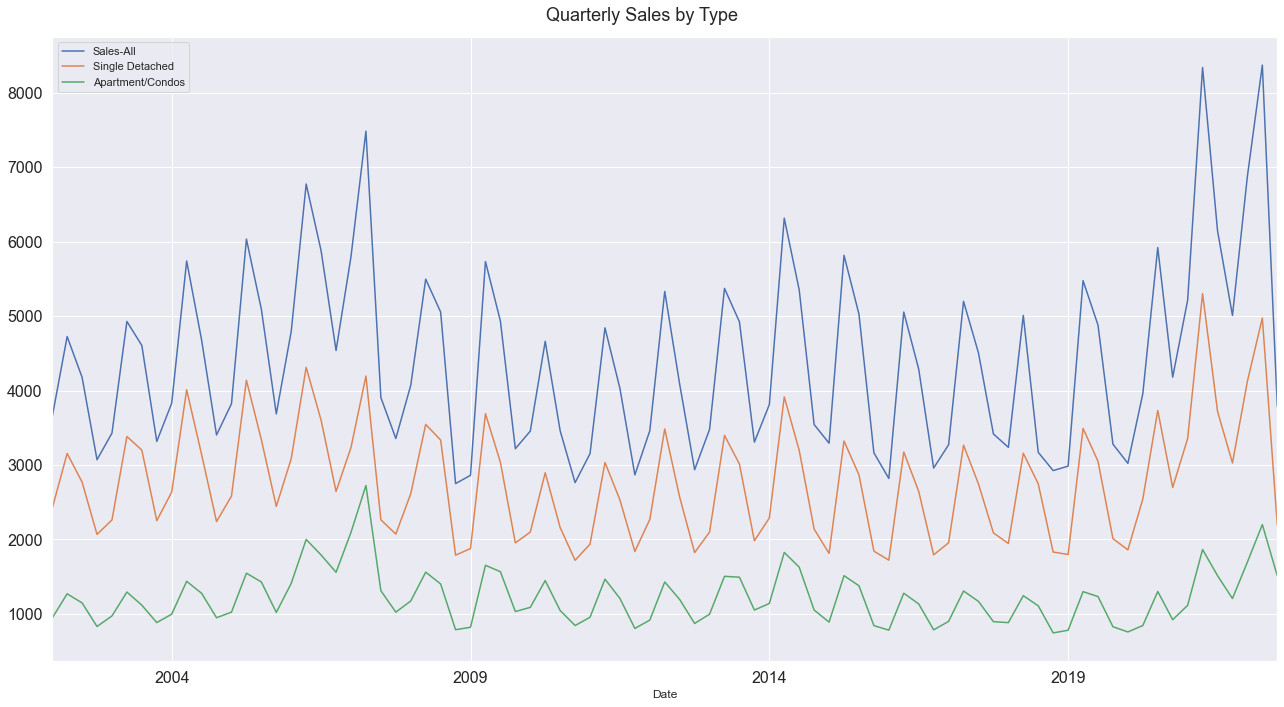

In [100]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Quarterly Sales by Type', fontsize=18)

sales[['Sales-All','Single Detached','Apartment/Condos']].plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()
plt.savefig('edmonton/q_sales.png')

In [89]:
wages = sc.table_to_df('14-10-0203-01')

14100203-eng.zip: 100%|██████████| 93.7M/93.7M [01:04<00:00, 1.45MB/s]


In [57]:
wages['North American Industry Classification System (NAICS)'].unique()

array(['Industrial aggregate excluding unclassified businesses [11-91N]',
       'Goods producing industries [11-33N]',
       'Forestry, logging and support [11N]',
       'Forestry and logging [113]', 'Logging [1133]',
       'Support activities for forestry [1153]',
       'Mining, quarrying, and oil and gas extraction [21]',
       'Oil and gas extraction [211,2111]',
       'Mining and quarrying (except oil and gas) [212]',
       'Coal mining [2121]', 'Metal ore mining [2122]',
       'Non-metallic mineral mining and quarrying [2123]',
       'Support activities for mining, and oil and gas extraction [213,2131]',
       'Utilities [22,221]',
       'Electric power generation, transmission and distribution [2211]',
       'Natural gas distribution [2212]',
       'Water, sewage and other systems [2213]', 'Construction [23]',
       'Construction of buildings [236]',
       'Residential building construction [2361]',
       'Non-residential building construction [2362]',
       'He

In [90]:
agg_wages = wages[(wages['GEO']=='Alberta') & (wages['Overtime']=='Including overtime') &(wages['Type of employees']=='All employees') &(wages['North American Industry Classification System (NAICS)']=='Industrial aggregate excluding unclassified businesses [11-91N]')].set_index('REF_DATE')

In [94]:
prices['Average Weekly Wages']=agg_wages['2006':]['VALUE'].values

In [97]:
mtg=prices[['SFD Average Mortgage Payment 20%_down','SFD Average Mortgage Payment 5%_down','APT Average Mortgage Payment 5%_down','APT Average Mortgage Payment 20%_down']]

In [108]:
mtg = mtg.divide((prices['Average Weekly Wages']*4),axis=0)

In [112]:
mtg.index = pd.PeriodIndex(mtg.index,freq='M').to_timestamp()

In [114]:
mtg[['SFD Average Mortgage Payment 20%_down','SFD Average Mortgage Payment 5%_down','APT Average Mortgage Payment 5%_down','APT Average Mortgage Payment 20%_down']].resample('Q').mean().to_csv('mortgage_vs_income_q.csv')

In [115]:
mtg[['SFD Average Mortgage Payment 20%_down','SFD Average Mortgage Payment 5%_down','APT Average Mortgage Payment 5%_down','APT Average Mortgage Payment 20%_down']].to_csv('mortgage_vs_income_m.csv')

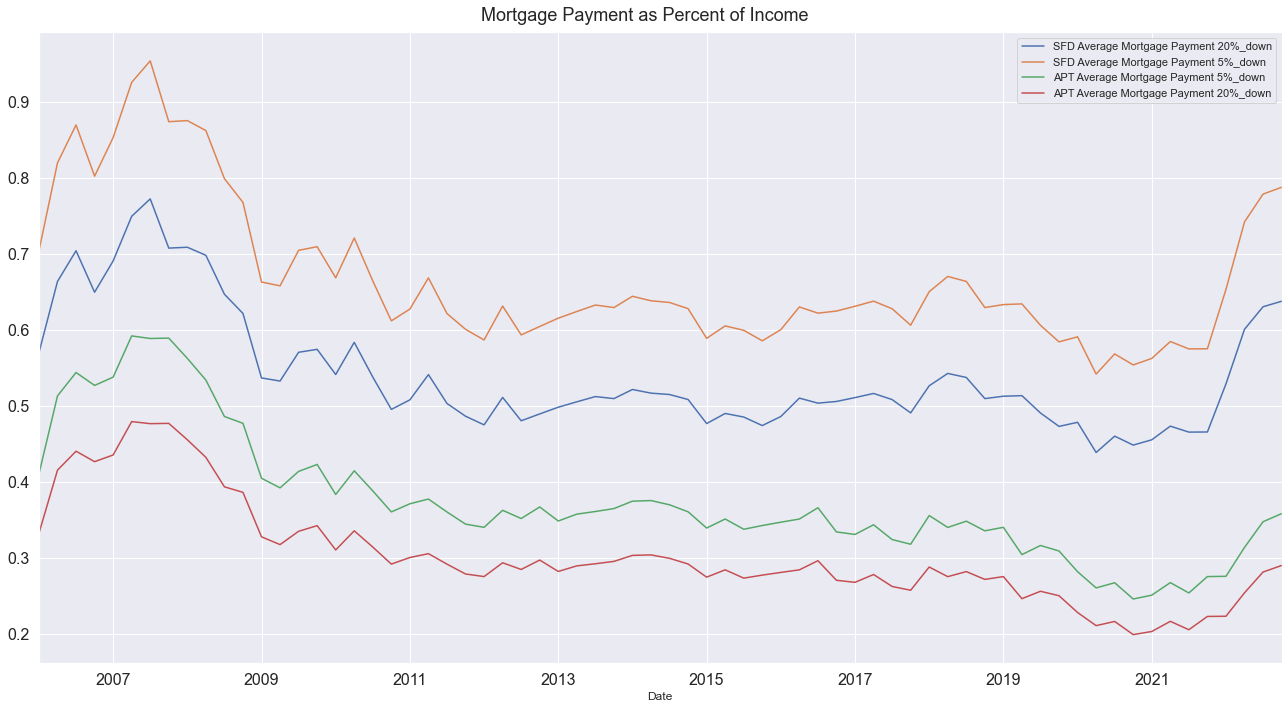

In [113]:
fig, ax = plt.subplots(figsize=(18,10))
fig.suptitle('Mortgage Payment as Percent of Income', fontsize=18)

mtg[['SFD Average Mortgage Payment 20%_down','SFD Average Mortgage Payment 5%_down','APT Average Mortgage Payment 5%_down','APT Average Mortgage Payment 20%_down']].resample('Q').mean().plot(legend=True,fontsize=16,ax=ax)
plt.tight_layout()


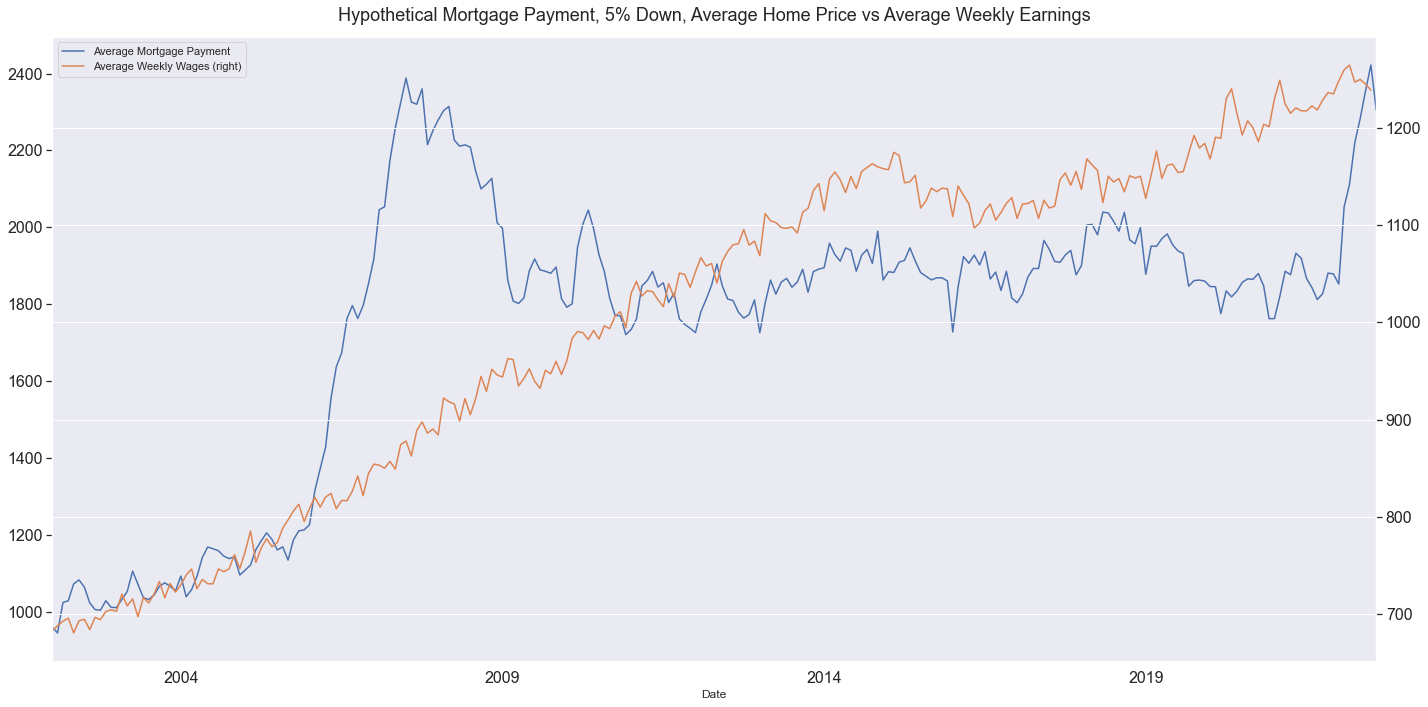

In [71]:
fig, ax = plt.subplots(figsize=(20,10))
fig.suptitle('Hypothetical Mortgage Payment, 5% Down, Average Home Price vs Average Weekly Earnings', fontsize=18)

prices[['Average Mortgage Payment']].plot(ax=ax,fontsize=16)
prices[['Average Weekly Wages']].plot(ax=ax,fontsize=16,secondary_y=True)
plt.tight_layout()
plt.savefig('edmonton/mtg_payment.png')

In [72]:
building_cost = sc.table_to_df('18-10-0135-01')

18100135-eng.zip: 100%|██████████| 177k/177k [00:00<00:00, 231kB/s]  


In [73]:
building_cost_edm = building_cost[building_cost['GEO']=='Edmonton, Alberta']
building_cost_edm=building_cost_edm.filter(items = ['REF_DATE','Type of building', 'VALUE'])


In [76]:
building_cost_edm=building_cost_edm.pivot(index='REF_DATE',columns='Type of building',values="VALUE")

In [101]:
building_cost_edm.diff(4)

Type of building,Apartment buildings,Bus depot with maintenance and repair facilities,Commercial buildings [62212],Factory,High-rise apartment building (five or more storeys),Industrial buildings [62211],Institutional buildings [62213],Low-rise apartment building (fewer than five storeys),Non-residential buildings [622],Office building,Residential buildings [621],School,Shopping centre,Single-detached house,Townhouse,Warehouse
REF_DATE,,,,,,,,,,,,,,,,
1981-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982-01-01,NaN,NaN,5.0,4.6,NaN,4.6,4.2,NaN,4.7,3.7,NaN,4.2,5.0,NaN,NaN,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-01,22.7,7.2,6.4,9.6,5.9,8.5,4.6,24.8,6.3,4.4,24.2,4.6,5.0,24.5,26.3,8.6
2021-07-01,25.3,11.0,10.0,14.2,8.0,12.7,7.3,27.3,9.7,7.5,27.6,7.3,7.7,28.2,29.5,13.0
2021-10-01,27.2,16.5,14.1,19.5,11.4,17.8,10.0,28.9,13.6,10.3,28.4,10.0,11.7,28.7,29.9,17.8


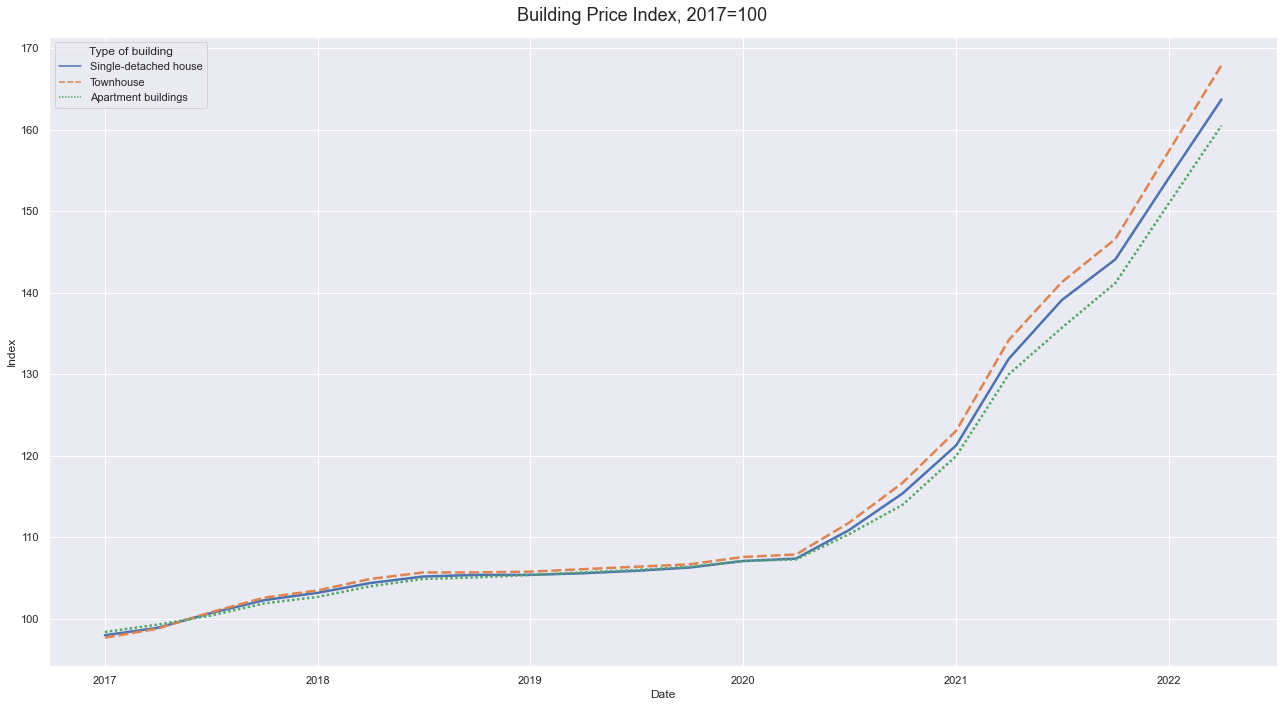

In [86]:
fig,ax=plt.subplots(figsize=(18,10))

sns.lineplot(data=building_cost_edm[['Single-detached house','Townhouse','Apartment buildings']],linewidth=2.5,ax=ax)
ax.set_ylabel('Index')
ax.set_xlabel('Date')
fig.suptitle('Building Price Index, 2017=100',fontsize=18)
fig.tight_layout()
plt.savefig('edmonton/building_price.png')

In [17]:
apt_price_indx = sc.table_to_df('18-10-0273-01')

18100273-eng.zip: 100%|██████████| 3.41k/3.41k [00:00<00:00, 568kB/s]
